# base_model

### import

In [19]:
#import sys
#sys.path.append('../data/zip/')

import os

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### methods and definitions

In [2]:
# -

def _get_y_prob_pred(y_pred):

    return [ pred[1] for pred in y_pred.tolist() ]

def _get_y_pred_label(y_prob_pred, th):

    return [1 if p > th else 0 for p in y_prob_pred]

def _get_data( what='train', state = 'raw' ):

    data_path = '../data/%s/%s.csv' % ( state, what )
    if not os.path.isfile( data_path ):
        raise ValueError
    
    return pd.read_csv( data_path ).set_index( 'ID_code' )

def _submit(target_pred, send=False):
    
    files = []
    for f in os.listdir('../data/submit/'):
        if f.endswith(".csv"):
            files.append(f)
    
    if not files: 
        next_id = 1
    else:
        last_id = max([ int(file.split('_')[1].split('.')[0]) for file in files ])
        next_id = last_id + 1
    
    next_file_name = '../data/submit/submit_%s.csv' % next_id
    
    test = _get_data(what='test', state='raw')
    test['target'] = target_pred
    
    submit = test.loc[:,['target']]
    submit.to_csv(next_file_name)
    
    if send:
        return 'next tbd'
    else:
        return '%s was saved' % next_file_name.rsplit('/', 1)[1]

# -

### train / test

In [6]:
raw_train = _get_data(what='train', state='raw')
raw_train.shape

(200000, 201)

In [7]:
raw_train.target.describe()

count    200000.000000
mean          0.100490
std           0.300653
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

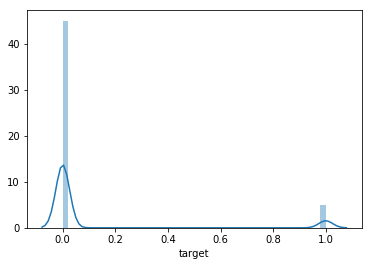

In [8]:
sns.distplot(raw_train.target)

In [10]:
th_01 = np.mean(raw_train.target)
th_01

0.10049

In [12]:
train = raw_train.copy()

X = train.drop(["target"], axis=1)
y = train["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

### evaluate

In [ ]:
y_pred = model.predict_proba(X_test)
y_prob_pred = _get_y_prob_pred(y_pred)
y_pred_label = _get_y_pred_label(y_prob_pred, th=th_01)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test), np.array(y_prob_pred))
auc = round(metrics.auc(fpr, tpr), 4)

print('auc: %s' % auc)
print(pd.Series(y_prob_pred).describe())
sns.distplot(y_prob_pred)

In [ ]:
print(pd.Series(y_pred_label).describe())
sns.distplot(y_pred_label)

### base model

In [ ]:
base_model = LogisticRegression()
base_model.fit(X, y)
test = _get_data(what='test', state='raw')

In [15]:
base_model_pred = base_model.predict_proba(test)
base_model_prob_pred = _get_y_prob_pred(base_model_pred)
base_model_pred_label = _get_y_pred_label(base_model_prob_pred, th=th_01)

count    200000.000000
mean          0.095182
std           0.140086
min           0.000027
25%           0.014357
50%           0.040213
75%           0.110753
max           0.995837
dtype: float64


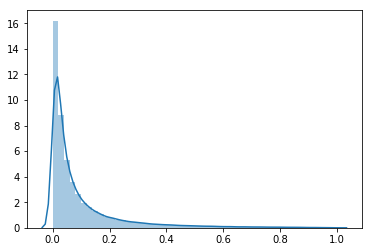

In [16]:
print(pd.Series(base_model_prob_pred).describe())
sns.distplot(base_model_prob_pred)

count    200000.000000
mean          0.271450
std           0.444709
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
dtype: float64


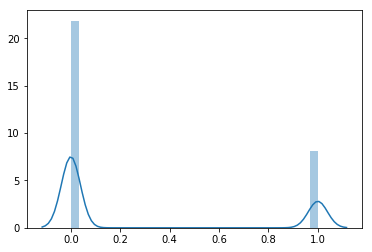

In [17]:
print(pd.Series(base_model_pred_label).describe())
sns.distplot(base_model_pred_label)

### submit

In [20]:
_submit(base_model_pred_label)

'next tbd'